<a href="https://colab.research.google.com/github/AmeeMadhani/ISSR3/blob/main/All_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## TASK-1: Mental Health-Related Post Extraction

### Steps Followed:
1. **Install Dependencies**

3. **Initialize Reddit API**: Used `praw` with API credentials to access Reddit.
4. **Define Subreddits & Keywords**: Selected mental health-related subreddits and relevant keywords for filtering posts.
5. **Preprocess Text**:
   - Convert to lowercase.
   - Remove URLs, special characters, and punctuation.
   - Tokenize words and remove stopwords.
6. **Extract Data**:
   - Fetched posts and created a dataset of around 1500 rows .
   - Filtered posts based on keywords.
   - Stored Post ID, Timestamp, Content (cleaned & uncleaned), Upvotes, and Comments.
7. **Save as CSV**: Stored the structured data in `Task_1_reddit_mental_health_posts_with_both_versions.csv`.

**Note** - Sentiment analysis worked better on content with stop words, hence both tpye of content is stored;

content with stop words = uncleaned data

content without stop words = cleaned data



In [ ]:
pip install praw pandas nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import praw
import pandas as pd
import re
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Reddit API credentials (Replace with your own credentials)
reddit = praw.Reddit(
    client_id="QVRPfjGyGiJMXYyn8TZKjw",
    client_secret="LQKMoxrasVi85iWBDr8bsXgcsoXGkQ",
    user_agent="Data:v1.0"
)

# Subreddits related to mental health
subreddits = [
    "depression", "EDAnonymous", "addiction", "alcoholism", "adhd", "anxiety", "autism", "bipolarreddit", "bpd",
    "healthanxiety", "lonely", "ptsd", "socialanxiety", "suicidewatch", "mentalhealth", "COVID19_support", "stress"
]

# Keywords to filter relevant posts
keywords = ["depressed", "addiction help", "overwhelmed", "suicidal", "anxiety attack",
    "mental breakdown", "self harm", "panic attack", "substance abuse",
    "emotional distress", "feeling hopeless", "need help", "mental health",
    "struggling with depression", "feeling lost", "mental trauma"]

# Function to clean text while preserving an uncleaned version
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))

    cleaned_text = ' '.join([word for word in words if word not in stop_words])  # Without stopwords
    uncleaned_text = ' '.join(words)  # Original text with stopwords

    return cleaned_text, uncleaned_text

# Extract posts and store in a list
data = []

for subreddit in subreddits:
    sub = reddit.subreddit(subreddit)
    for post in sub.hot(limit=500):  # Fetch top 500 posts
        if any(keyword in post.title.lower() or keyword in post.selftext.lower() for keyword in keywords):
            cleaned_text, uncleaned_text = clean_text(post.title + " " + post.selftext)
            data.append({
                "Post_ID": post.id,
                "Timestamp": post.created_utc,
                "Content_Cleaned": cleaned_text,  # Without stopwords
                "Content_Uncleaned": uncleaned_text,  # With stopwords
                "Upvotes": post.score,
                "Comments": post.num_comments
            })

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("/content/drive/MyDrive/Colab Notebooks/results for issr/Task_1_reddit_mental_health_posts_with_both_versions.csv", index=False)

print("Data extraction and preprocessing completed. CSV file saved.")



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Data extraction and preprocessing completed. CSV file saved.


In [ ]:
df

,Post_ID,Timestamp,Content_Cleaned,Content_Uncleaned,Upvotes,Comments
0,doqwow,1.572361e+09,mostbroken leastunderstood rules helpers may i...,our mostbroken and leastunderstood rules is he...,2363,177
1,1jj2qku,1.742852e+09,feeling suicidal dont want anymore genuinely f...,feeling suicidal i dont want to be here anymor...,44,19
2,1jjcnnx,1.742882e+09,food become tasteless youre depressed used hug...,why does food become tasteless when youre depr...,8,1
3,1jjdmp1,1.742887e+09,someone killed trying help didnt want mesn hur...,someone just killed themselves because of me i...,5,2
4,1jjab20,1.742873e+09,struggling self harm tonight lonely crave endo...,struggling not to self harm tonight lonely and...,8,5
...,...,...,...,...,...,...
1473,1go18w0,1.731247e+09,stressed poor time management skills school re...,stressed i have very poor time management skil...,2,3
1474,1gmhe8c,1.731069e+09,feeling overwhelmed stressed gaming probably s...,feeling overwhelmed and stressed over gaming t...,2,11
1475,1gkl736,1.730851e+09,tense feel pulse jaw temples eyes get anxiety ...,tense and can feel pulse in jaw temples eyes i...,2,2
1476,1gjcjvf,1.730722e+09,anyone else feel lost overwhelmed looking advice,anyone else feel lost and overwhelmed looking ...,2,5



## Task 2: Sentiment & Crisis Risk Classification (NLP & Text Processing)

### Steps Followed:
1. Installed necessary libraries.
2. Applied VADER for sentiment classification (Positive, Neutral, Negative).
3. Used BERT embeddings and KMeans clustering to categorize posts into risk levels:
   - **High-Risk**
   - **Moderate Concern**
   - **Low Concern**

   1. "bert-base-uncased" for text processing and creating embeddings
   2. Stacked BERT_Embeddings with Sentiment_Label
   3. Applied KMeans as it is a unsupervised data

4. Stored results in sentiment analysis in `reddit_mental_health_vader_analysis.csv` .
5. stored both sentiment analysis results and Risk classification results in `classified_posts.csv`
5. Plotted sentiment distribution.
6. Plotted sentiment and risk level distributions, using Seaborn
7. Used `Content_Uncleaned` for VADER sentiment analysis.
8. Used `Content_Cleaned` for BERT embeddings and risk classification.

In [ ]:
pip install numpy vaderSentiment matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize VADER Sentiment Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Sentiment Analysis Function
def vader_sentiment_analysis(text):
    # Get sentiment scores
    sentiment_scores = vader_analyzer.polarity_scores(text)

    # Classify sentiment based on compound score
    if sentiment_scores['compound'] > 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] < -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return pd.Series({
        'Sentiment_Label': sentiment,
        'Sentiment_Compound_Score': sentiment_scores['compound'],
        'Sentiment_Positive_Score': sentiment_scores['pos'],
        'Sentiment_Negative_Score': sentiment_scores['neg'],
        'Sentiment_Neutral_Score': sentiment_scores['neu']
    })

# Apply VADER sentiment analysis
sentiment_results = df['Content_Uncleaned'].apply(vader_sentiment_analysis)

# Combine results with original DataFrame
df = pd.concat([df, sentiment_results], axis=1)


In [ ]:
df

,Post_ID,Timestamp,Content_Cleaned,Content_Uncleaned,Upvotes,Comments,Sentiment_Label,Sentiment_Compound_Score,Sentiment_Positive_Score,Sentiment_Negative_Score,Sentiment_Neutral_Score
0,doqwow,1.572361e+09,mostbroken leastunderstood rules helpers may i...,our mostbroken and leastunderstood rules is he...,2363,177,Positive,0.9973,0.185,0.106,0.709
1,1jj2qku,1.742852e+09,feeling suicidal dont want anymore genuinely f...,feeling suicidal i dont want to be here anymor...,44,19,Negative,-0.7135,0.155,0.258,0.587
2,1jjcnnx,1.742882e+09,food become tasteless youre depressed used hug...,why does food become tasteless when youre depr...,8,1,Negative,-0.4019,0.067,0.083,0.850
3,1jjdmp1,1.742887e+09,someone killed trying help didnt want mesn hur...,someone just killed themselves because of me i...,5,2,Negative,-0.9936,0.042,0.360,0.598
4,1jjab20,1.742873e+09,struggling self harm tonight lonely crave endo...,struggling not to self harm tonight lonely and...,8,5,Positive,0.0644,0.294,0.281,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1473,1go18w0,1.731247e+09,stressed poor time management skills school re...,stressed i have very poor time management skil...,2,3,Negative,-0.9904,0.079,0.189,0.732
1474,1gmhe8c,1.731069e+09,feeling overwhelmed stressed gaming probably s...,feeling overwhelmed and stressed over gaming t...,2,11,Positive,0.9473,0.153,0.058,0.789
1475,1gkl736,1.730851e+09,tense feel pulse jaw temples eyes get anxiety ...,tense and can feel pulse in jaw temples eyes i...,2,2,Negative,-0.9821,0.021,0.243,0.736
1476,1gjcjvf,1.730722e+09,anyone else feel lost overwhelmed looking advice,anyone else feel lost and overwhelmed looking ...,2,5,Negative,-0.2732,0.114,0.219,0.667


Sentiment Distribution:
Sentiment_Label
Negative    1027
Positive     435
Neutral       16
Name: count, dtype: int64

Sentiment Scores Summary:
       Sentiment_Compound_Score  Sentiment_Positive_Score  \
count               1478.000000               1478.000000   
mean                  -0.367221                  0.109300   
std                    0.766897                  0.055359   
min                   -0.999900                  0.000000   
25%                   -0.973900                  0.075000   
50%                   -0.838500                  0.105000   
75%                    0.439600                  0.136000   
max                    0.999300                  0.577000   

       Sentiment_Negative_Score  Sentiment_Neutral_Score  
count               1478.000000              1478.000000  
mean                   0.152891                 0.737830  
std                    0.067574                 0.077189  
min                    0.000000                 0.308000  
25%        

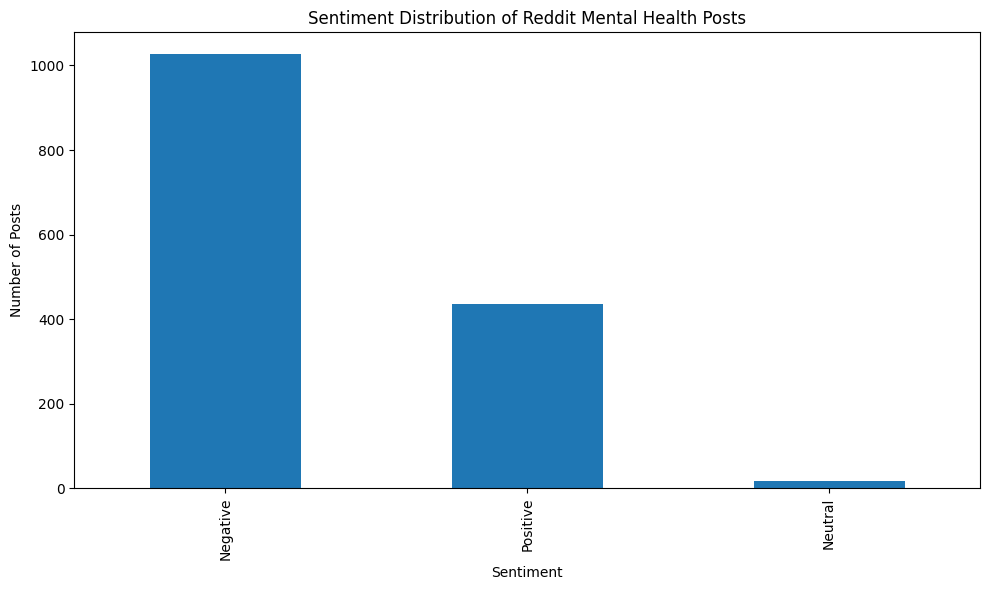

In [ ]:
# Visualization of Sentiment Distribution
plt.figure(figsize=(10, 6))
sentiment_counts = df['Sentiment_Label'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution of Reddit Mental Health Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('vader_sentiment_distribution.png')

# summary statistics
print("Sentiment Distribution:")
print(sentiment_counts)

# Descriptive statistics of sentiment scores
print("\nSentiment Scores Summary:")
print(df[['Sentiment_Compound_Score', 'Sentiment_Positive_Score',
          'Sentiment_Negative_Score', 'Sentiment_Neutral_Score']].describe())

df.to_csv("/content/drive/MyDrive/Colab Notebooks/results for issr/Task_2_reddit_mental_health_vader_analysis.csv", index=False)

print("Done")



In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Dataset class for fine-tuning
class RiskDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len=512):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0)
        }

# Prepare BERT Embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model.bert(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()

df["BERT_Embeddings"] = df["Content_Cleaned"].apply(get_bert_embeddings)

# Convert Sentiment to Numerical Values
sentiment_map = {"Positive": 2, "Neutral": 1, "Negative": 0}
df["Sentiment_Score"] = df["Sentiment_Label"].map(sentiment_map)

# Combine BERT Embeddings with Sentiment Score
X = np.stack(df["BERT_Embeddings"].values)
X = np.hstack((X, df[["Sentiment_Score"]].values))

# KMeans Clustering
num_clusters = 3  # Assuming three risk levels
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Risk_Level"] = kmeans.fit_predict(X)

# Map Cluster Labels to Risk Levels
RISK_LEVELS = {
    0: "Low Concern",
    1: "Moderate Concern",
    2: "High-Risk"
}
df["Risk_Level"] = df["Risk_Level"].map(RISK_LEVELS)

df.to_csv("classified_posts.csv", index=False)

# Plot Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Risk_Level"], hue=df["Sentiment_Label"], palette="coolwarm")
plt.title("Distribution of Sentiment and Risk Levels")
plt.show()


In [ ]:
df

,Post_ID,Timestamp,Content_Cleaned,Content_Uncleaned,Upvotes,Comments,Sentiment_Label,Sentiment_Compound_Score,Sentiment_Positive_Score,Sentiment_Negative_Score,Sentiment_Neutral_Score,BERT_Embeddings,Sentiment_Score,Risk_Level
0,doqwow,1.572361e+09,mostbroken leastunderstood rules helpers may i...,our mostbroken and leastunderstood rules is he...,2363,177,Positive,0.9973,0.185,0.106,0.709,"[-0.20542341, 0.21596538, 0.12711088, 0.062102...",2,Low Concern
1,1jj2qku,1.742852e+09,feeling suicidal dont want anymore genuinely f...,feeling suicidal i dont want to be here anymor...,44,19,Negative,-0.7135,0.155,0.258,0.587,"[-0.18218459, 0.38434124, -0.124830134, -0.373...",0,Moderate Concern
2,1jjcnnx,1.742882e+09,food become tasteless youre depressed used hug...,why does food become tasteless when youre depr...,8,1,Negative,-0.4019,0.067,0.083,0.850,"[0.11780499, 0.23595163, 0.242173, -0.11844194...",0,Moderate Concern
3,1jjdmp1,1.742887e+09,someone killed trying help didnt want mesn hur...,someone just killed themselves because of me i...,5,2,Negative,-0.9936,0.042,0.360,0.598,"[-0.06093934, 0.55565935, -0.10892271, -0.0437...",0,Moderate Concern
4,1jjab20,1.742873e+09,struggling self harm tonight lonely crave endo...,struggling not to self harm tonight lonely and...,8,5,Positive,0.0644,0.294,0.281,0.424,"[-0.13829118, -0.01899321, 0.044417102, -0.271...",2,High-Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,1go18w0,1.731247e+09,stressed poor time management skills school re...,stressed i have very poor time management skil...,2,3,Negative,-0.9904,0.079,0.189,0.732,"[-0.12034596, 0.06731068, 0.25445434, 0.095163...",0,High-Risk
1474,1gmhe8c,1.731069e+09,feeling overwhelmed stressed gaming probably s...,feeling overwhelmed and stressed over gaming t...,2,11,Positive,0.9473,0.153,0.058,0.789,"[-0.03621664, 0.16413334, 0.3652114, -0.124676...",2,High-Risk
1475,1gkl736,1.730851e+09,tense feel pulse jaw temples eyes get anxiety ...,tense and can feel pulse in jaw temples eyes i...,2,2,Negative,-0.9821,0.021,0.243,0.736,"[-0.2832689, 0.39648014, 0.31245837, -0.327974...",0,Moderate Concern
1476,1gjcjvf,1.730722e+09,anyone else feel lost overwhelmed looking advice,anyone else feel lost and overwhelmed looking ...,2,5,Negative,-0.2732,0.114,0.219,0.667,"[-0.02788811, 0.26656932, 0.066981904, -0.0371...",0,High-Risk


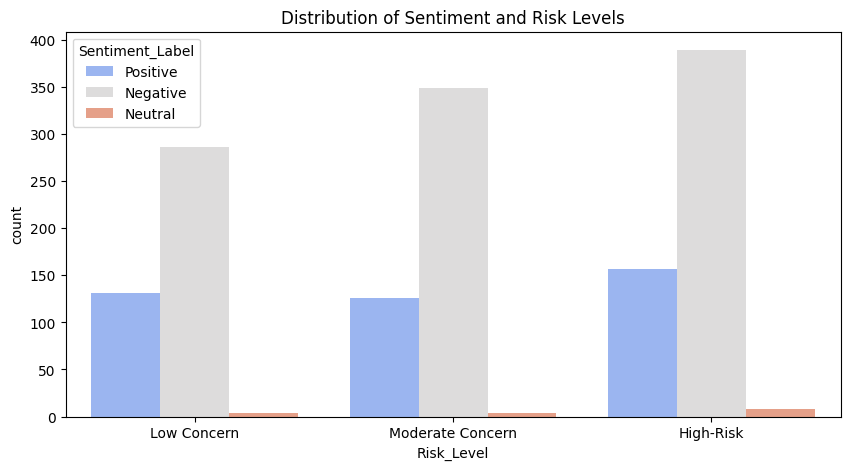

In [ ]:
# Plot Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Risk_Level"], hue=df["Sentiment_Label"], palette="coolwarm")
plt.title("Distribution of Sentiment and Risk Levels")
plt.show()


## Task 3: Crisis Geolocation & Mapping (Basic Geospatial Analysis & Visualization)

### Steps Followed:
1. Used spaCy for named entity recognition to extract geographic locations (cities, states, and countries)
2. Testing the functions on test_texts
3. Implemented the above with Regex and saved extracted locations in `Task_3_processed_locations.csv`
4. Geocode a location with error handling and rate limiting.
5. Identified and Fixed Potential Location Variations
6. Stored lats and longs with locations in `Task_3_location_coordinates.csv
`
7. Standardized the location names and abbrevations by finding the subsets in a string, mapped and stored in `Task_3_standard_locations_with_coordinates`
7. Stored everything in the `Task_3_master_dataset.csv`
7. Created another Dataset with only sentiment_label, location, coordinates and risk_label, for risk label classified heatmap. `Task_3_filtered_output.csv`
8. Created count mapping of the locations to identify the top 5
6. Plotted heatmap of just the locations for testing.
7. Plotted heatmap of locatoins with color codes for risk labels.




In [ ]:
import spacy
import pandas as pd

# Load spaCy's English language model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy English model...")
    # Uncomment the following line if the model needs to be downloaded
    # !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

def extract_locations_demo(text):
    """
    Demonstrate comprehensive location extraction

    """
    doc = nlp(text)

    # Collect all geographic entities
    locations = []

    # Extract various types of geographic entities
    for ent in doc.ents:
        # Geo-Political Entities (GPE) - cities, states, countries
        if ent.label_ in ['GPE', 'LOC']:
            locations.append(ent.text)

    return list(set(locations))

# Test cases to demonstrate location detection
test_texts = [
    "I'm struggling in Portland, Oregon right now.",
    "Need help in Austin, Texas during this crisis.",
    "Things are tough here in Miami, Florida.",
    "Experiencing difficulties in Seattle, Washington.",
    "Crisis affecting people in rural Montana.",
    "Seeking support in Denver, Colorado.",
    "Challenges in Phoenix, Arizona are increasing.",
    "Help needed in rural Alaska.",
    "Situation is critical in Charleston, South Carolina.",
    "Experiencing issues in Houston, Texas."
]

# Demonstrate location extraction
print("Location Detection Demonstration:")
for text in test_texts:
    locations = extract_locations_demo(text)
    print(f"\nText: {text}")
    print("Detected Locations:", locations)


Location Detection Demonstration:

Text: I'm struggling in Portland, Oregon right now.
Detected Locations: ['Oregon', 'Portland']

Text: Need help in Austin, Texas during this crisis.
Detected Locations: ['Texas', 'Austin']

Text: Things are tough here in Miami, Florida.
Detected Locations: ['Miami', 'Florida']

Text: Experiencing difficulties in Seattle, Washington.
Detected Locations: ['Washington', 'Seattle']

Text: Crisis affecting people in rural Montana.
Detected Locations: ['Montana']

Text: Seeking support in Denver, Colorado.
Detected Locations: ['Colorado', 'Denver']

Text: Challenges in Phoenix, Arizona are increasing.
Detected Locations: ['Phoenix', 'Arizona']

Text: Help needed in rural Alaska.
Detected Locations: ['Alaska']

Text: Situation is critical in Charleston, South Carolina.
Detected Locations: ['South Carolina', 'Charleston']

Text: Experiencing issues in Houston, Texas.
Detected Locations: ['Texas', 'Houston']


In [ ]:
import pandas as pd
import re
import spacy
from typing import List, Dict

# Load spaCy's English language model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy English model...")
    # !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

def extract_locations(text: str) -> List[str]:
    """
    Enhanced location extraction with comprehensive filtering

    """
    if not isinstance(text, str):
        return []

    # Comprehensive location dictionary with variations and categories
    location_dict: Dict[str, str] = {
        # Countries
        'usa': 'United States', 'Us': 'United States',
        'uk': 'United Kingdom', 'u.k.': 'United Kingdom',

        # Regions
        'sa': 'South America',
        'sea': 'Southeast Asia',


        # Countries and major cities
        'ny': 'New York', 'nyc': 'New York City',
        'la': 'Los Angeles', 'sf': 'San Francisco',
        'dc': 'Washington DC', 'chi': 'Chicago',
        'atl': 'Atlanta',

        # Continents
        'eu': 'Europe', 'af': 'Africa', 'as': 'Asia',
        'oc': 'Oceania'
    }

    # Non-location words to filter out created using the first run of the functoins beow (expanded list)
    non_location_words = {
        'im', 'ill', 'va', 'realy', 'thanks', 'everyday', 'time', 'dynamic',
        'listening', 'worse', 'state', 'metro', 'red', 'moon', 'st', 'septum',
        'thrill', 'normal', 'instancewe', 'gras', 'huan', 'cpt', 'prc', 'asap',
        # Medical and psychological terms
        'agoraphobia', 'bpd', 'melanoma', 'meth', 'phobia',
        'pregabalin', 'snris', 'ssris', 'amygdala', 'ashwagandha',
        # Other non-location words
        'patricks', 'netflix', 'Helpline', 'Comfort',
    }

    # Refined location patterns
    location_patterns = [
        # Captures locations after specific prepositions with more context
        r'\b(in|from|at|near|around|by)\s+([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)\b',

        # Captures regions and directional locations
        r'\b(northern|southern|eastern|western)\s+([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)\b',

        # Captures countries and regions with optional articles
        r'\b(the\s)?([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\s*(?:Country|Region|State|Province))\b'
    ]

    locations: List[str] = []

    # SpaCy Named Entity Recognition (NER) for location extraction
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ['GPE', 'LOC'] and len(ent.text.split()) <= 3:
            locations.append(ent.text.title())

    # Regex-based location extraction with more sophisticated filtering
    for pattern in location_patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        for match in matches:
            loc = match[-1].strip().title()
            if (2 <= len(loc.split()) <= 3 and  # Length constraints
                all(word[0].isupper() for word in loc.split())):  # All words capitalized
                locations.append(loc)

    # Custom location keyword detection with case-insensitive matching
    words = text.lower().split()
    for word in words:
        if word in location_dict:
            locations.append(location_dict[word])

    # Advanced filtering and deduplication
    filtered_locations = list(set(
        loc for loc in locations
        if len(loc) > 1 and  # Minimum length
        len(loc.split()) <= 3 and  # Maximum 3 words
        loc.lower() not in non_location_words and  # Remove non-location words
        not any(banned in loc.lower() for banned in non_location_words)
    ))

    return filtered_locations

def process_dataset(df: pd.DataFrame) -> pd.DataFrame:
    " Process the dataset to extract locations "
    # Create a copy of the DataFrame
    processed_df = df.copy()

    # Extract locations
    processed_df['Extracted_Locations'] = processed_df['Content_Cleaned'].apply(extract_locations)

    return processed_df

def save_locations_to_csv(df: pd.DataFrame, output_file: str = '/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_processed_locations.csv'):
    """
    Save processed DataFrame with extracted locations to CSV

    """
    df.to_csv(output_file, index=False)
    print(f"Processed data saved to {output_file}")

    print("\nLocation Extraction Summary:")
    print("-" * 30)

    # Count of posts with detected locations
    location_counts = df['Extracted_Locations'].apply(len)
    print(f"Total Posts: {len(df)}")
    print(f"Posts with Locations: {sum(location_counts > 0)}")

    # Display sample rows with extracted locations
    print("\nSample Rows with Extracted Locations:")
    print(df[df['Extracted_Locations'].apply(len) > 0][['Content_Cleaned', 'Extracted_Locations']].head())

    # Aggregate and analyze unique locations
    all_locations = [loc for locations in df['Extracted_Locations'] for loc in locations]
    unique_locations = set(all_locations)

    print("\nUnique Locations Detected:")
    print("-" * 30)
    for location in sorted(unique_locations):
        print(location)

    print(f"\nTotal Unique Locations: {len(unique_locations)}")

def main():

    processed_df = process_dataset(df)
    save_locations_to_csv(processed_df)

if __name__ == "__main__":
    main()

Processed data saved to processed_locations.csv

Location Extraction Summary:
------------------------------
Total Posts: 1478
Posts with Locations: 84

Sample Rows with Extracted Locations:
                                       Content_Cleaned Extracted_Locations
62   say head thirties beautiful partner years brot...     [Africa, Italy]
109  easy life still depressed hello first time pos...            [Europe]
114  husband depressed moving husband showing signs...       [Los Angeles]
125  going give life one last chance hello dont kno...            [Europe]
166  advice ashamed public binge weight gain trigge...     [Washington DC]

Unique Locations Detected:
------------------------------
Africa
America
Arkansas
Asia
California
Canada
Chicago
China
Colorado
Comfort Zone
Europe
Florida
Fort
Helpline
India
Italy
Japan
Kinda
Latin America
Lebanon
London
Los Angeles
Manhattan
Massachusetts
Mexico
Missouri
Netherlands
New Hampshire
New Mexico
New York
New York City
North India
Oregon
Sout

In [ ]:
!pip install plotly geocoder

In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
import plotly.express as px
from typing import Tuple, Optional

class RateLimitedGeocoder:
    def __init__(self, delay_seconds=1):
        """
        Initialize a rate-limited geocoder to avoid overwhelming services

        """
        self.geolocator = Nominatim(user_agent="location_analysis_script")
        self.delay_seconds = delay_seconds

    def geocode(self, location: str) -> Optional[Tuple[float, float]]:
        """
        Geocode a location with error handling and rate limiting

        """
        try:
            # Add delay to prevent rate limiting
            time.sleep(self.delay_seconds)

            # Try geocoding with multiple location variations
            variations = [
                location,
                f"{location} City",
                f"{location} Region",
                f"City of {location}"
            ]

            for variation in variations:
                try:
                    # Attempt to geocode
                    result = self.geolocator.geocode(variation, exactly_one=True)

                    if result:
                        return (result.latitude, result.longitude)

                except (GeocoderTimedOut, GeocoderServiceError):
                    # If service error occurs, wait and continue to next variation
                    time.sleep(self.delay_seconds * 2)
                    continue

            return None

        except Exception as e:
            print(f"Error geocoding {location}: {e}")
            return None

def process_locations_with_coordinates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Process the DataFrame to add coordinate information for extracted locations

    """
    # Initialize geocoder
    geocoder = RateLimitedGeocoder()

    # Convert string representation of list to actual list
    df['Extracted_Locations'] = df['Extracted_Locations'].apply(eval)

    # Function to get coordinates for a list of locations
    def get_coordinates(locations):
        coords = []
        for loc in locations:
            coord = geocoder.geocode(loc)
            if coord:
                coords.append({
                    'location': loc,
                    'latitude': coord[0],
                    'longitude': coord[1],

                })
        return coords

    # Add new column with location coordinates
    df['Location_Coordinates'] = df['Extracted_Locations'].apply(get_coordinates)

    return df

def analyze_location_details(df: pd.DataFrame):
    """
    Provide detailed analysis of locations in the dataset

    """
    from collections import Counter

    # Flatten location coordinates
    coordinate_data = []
    for _, row in df.iterrows():
        coordinate_data.extend(row['Location_Coordinates'])

    # Convert to DataFrame for easier analysis
    coords_df = pd.DataFrame(coordinate_data)

    # Analysis
    print("\n--- Location Coordinate Extraction ---")
    print(f"Total Unique Locations Geocoded: {len(coords_df)}")


    return coords_df


# Load the dataset
drive_path = '/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_processed_locations.csv'
df = pd.read_csv(drive_path)

# Process locations and add coordinates
processed_df = process_locations_with_coordinates(df)

# Analyze location details
location_coords = analyze_location_details(processed_df)

# Save processed DataFrame with coordinates to Google Drive
processed_df.to_csv('/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_master_dataset.csv', index=False)

# Optional: Save location coordinates separately
location_coords.to_csv('/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_location_coordinates.csv', index=False)

print("\nProcessed files saved to Google Drive:")
print("1. location_distribution_map.html")
print("2. processed_locations_with_geocoded_coordinates.csv")
print("3. location_coordinates.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



--- Location Coordinate Extraction ---
Total Unique Locations Geocoded: 115

Processed files saved to Google Drive:
1. location_distribution_map.html
2. processed_locations_with_geocoded_coordinates.csv
3. location_coordinates.csv


In [ ]:
df

,Post_ID,Timestamp,Content_Cleaned,Content_Uncleaned,Upvotes,Comments,Sentiment_Label,Sentiment_Compound_Score,Sentiment_Positive_Score,Sentiment_Negative_Score,Sentiment_Neutral_Score,BERT_Embeddings,Sentiment_Score,Risk_Level,Extracted_Locations,Location_Coordinates
0,doqwow,1.572361e+09,mostbroken leastunderstood rules helpers may i...,our mostbroken and leastunderstood rules is he...,2363,177,Positive,0.9973,0.185,0.106,0.709,[-2.05423415e-01 2.15965375e-01 1.27110884e-...,2,Low Concern,[],[]
1,1jj2qku,1.742852e+09,feeling suicidal dont want anymore genuinely f...,feeling suicidal i dont want to be here anymor...,44,19,Negative,-0.7135,0.155,0.258,0.587,[-1.82184592e-01 3.84341240e-01 -1.24830134e-...,0,Moderate Concern,[],[]
2,1jjcnnx,1.742882e+09,food become tasteless youre depressed used hug...,why does food become tasteless when youre depr...,8,1,Negative,-0.4019,0.067,0.083,0.850,[ 1.17804989e-01 2.35951632e-01 2.42173001e-...,0,Moderate Concern,[],[]
3,1jjdmp1,1.742887e+09,someone killed trying help didnt want mesn hur...,someone just killed themselves because of me i...,5,2,Negative,-0.9936,0.042,0.360,0.598,[-6.09393418e-02 5.55659354e-01 -1.08922713e-...,0,Moderate Concern,[],[]
4,1jjab20,1.742873e+09,struggling self harm tonight lonely crave endo...,struggling not to self harm tonight lonely and...,8,5,Positive,0.0644,0.294,0.281,0.424,[-1.38291180e-01 -1.89932100e-02 4.44171019e-...,2,High-Risk,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,1go18w0,1.731247e+09,stressed poor time management skills school re...,stressed i have very poor time management skil...,2,3,Negative,-0.9904,0.079,0.189,0.732,[-1.20345958e-01 6.73106834e-02 2.54454345e-...,0,High-Risk,[],[]
1474,1gmhe8c,1.731069e+09,feeling overwhelmed stressed gaming probably s...,feeling overwhelmed and stressed over gaming t...,2,11,Positive,0.9473,0.153,0.058,0.789,[-3.62166390e-02 1.64133340e-01 3.65211397e-...,2,High-Risk,[],[]
1475,1gkl736,1.730851e+09,tense feel pulse jaw temples eyes get anxiety ...,tense and can feel pulse in jaw temples eyes i...,2,2,Negative,-0.9821,0.021,0.243,0.736,[-2.83268899e-01 3.96480143e-01 3.12458366e-...,0,Moderate Concern,[],[]
1476,1gjcjvf,1.730722e+09,anyone else feel lost overwhelmed looking advice,anyone else feel lost and overwhelmed looking ...,2,5,Negative,-0.2732,0.114,0.219,0.667,[-2.78881099e-02 2.66569316e-01 6.69819042e-...,0,High-Risk,[],[]


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_master_dataset.csv', index=False)

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_location_coordinates.csv')

# Get unique location names
unique_locations = df['location'].unique()

# Find potential variations or similar names
print("\nPotential Location Variations:")
variations = {}
for loc1 in unique_locations:
    for loc2 in unique_locations:
        if loc1 != loc2:
            # Check for partial matches or abbreviations
            if (loc1.lower() in loc2.lower() or
                loc2.lower() in loc1.lower() or
                (len(loc1) < 5 and len(loc2) > 5 and loc1.lower() in loc2.lower())):
                variations.setdefault(loc1, set()).add(loc2)

# Print variations
for base, variants in variations.items():
    print(f"{base}: {variants}")


Potential Location Variations:
Us: {'Massachusetts'}
New Mexico: {'Mexico'}
New York: {'New York City'}
Massachusetts: {'Us'}
New York City: {'New York'}
South America: {'America'}
Comfort Zone: {'Fort'}
Mexico: {'New Mexico'}
America: {'South America', 'Latin America'}
Latin America: {'America'}
North India: {'India'}
India: {'North India'}
Fort: {'Comfort Zone'}


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_location_coordinates.csv')

# Comprehensive Location Mapping Dictionary
location_mapping = {
    # Country/Region Name Standardizations
    'Us': 'United States of America',
    'America': 'United States of America',
    'Uk': 'United Kingdom',

    # Geographic Variations
    'New Mexico': 'Mexico',
    'New York City': 'New York',

    # Regional Variations
    'North India': 'India',

    # Optional: Clean up Ambiguous Entries
    'Kinda': 'Unknown',
    'Comfort Zone': 'Unknown'
}

#
# Standardize locations
df['standard_location'] = df['location'].replace(location_mapping)

# Print unique locations after standardization
print("Unique Locations After Standardization:")
print(sorted(df['standard_location'].unique()))




Unique Locations After Standardization:
['Africa', 'Arkansas', 'Asia', 'California', 'Canada', 'Chicago', 'China', 'Colorado', 'Europe', 'Florida', 'Fort', 'Helpline', 'India', 'Italy', 'Japan', 'Latin America', 'Lebanon', 'London', 'Los Angeles', 'Manhattan', 'Massachusetts', 'Mexico', 'Missouri', 'Netherlands', 'New Hampshire', 'New York', 'Oregon', 'South America', 'South Carolina', 'Spain', 'Switzerland', 'Tennessee', 'Texas', 'Thailand', 'Toronto', 'Turkey', 'United Kingdom', 'United States of America', 'Unknown', 'Venezuela', 'Washington DC']


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_standard_locations_with_coordinates', index=False)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_standard_locations_with_coordinates')

# Count location occurrences
location_counts = df['standard_location'].value_counts()

# Print top 5 locations
print("Top 5 Locations with Highest Crisis Discussions:")
print(location_counts.head())

# Create interactive heatmap
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='standard_location',
                     size_max=15,
                     hover_name='standard_location',
                     title='Crisis Discussion Locations Heatmap',
                     projection='natural earth')

# Customize the layout
fig.update_layout(height=600, margin={"r":0,"t":30,"l":0,"b":0})

# Show the plot
fig.show()

# Additional analysis
print("\nTotal Unique Locations:", len(df['standard_location'].unique()))
print("\nLocation Distribution:")
print(location_counts)

Top 5 Locations with Highest Crisis Discussions:
standard_location
United Kingdom    16
Unknown           11
South America     10
Canada             7
New York           6
Name: count, dtype: int64



Total Unique Locations: 41

Location Distribution:
standard_location
United Kingdom              16
Unknown                     11
South America               10
Canada                       7
New York                     6
United States of America     6
Europe                       6
California                   4
Africa                       4
Texas                        4
Colorado                     3
Florida                      3
Mexico                       3
Los Angeles                  3
South Carolina               2
India                        2
Washington DC                1
Arkansas                     1
New Hampshire                1
Italy                        1
Missouri                     1
Lebanon                      1
Massachusetts                1
Manhattan                    1
Oregon                       1
Japan                        1
London                       1
Asia                         1
Helpline                     1
Toronto                      1


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_master_dataset.csv")

# Convert 'Extracted_Locations' to lists if they are stored as strings
df["Extracted_Locations"] = df["Extracted_Locations"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Filter rows where 'Extracted_Locations' is not empty
filtered_df = df[df["Extracted_Locations"].apply(lambda x: isinstance(x, list) and len(x) > 0)]

# Select required columns
filtered_df = filtered_df[["Extracted_Locations", "Location_Coordinates", "Risk_Level", "Sentiment_Label"]]

# Save to CSV
filtered_df.to_csv("/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_filtered_output.csv", index=False)


In [ ]:
import pandas as pd
import folium
import json
from IPython.display import display

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/results for issr/Task_3_filtered_output.csv")

# Convert 'Location_Coordinates' to a list of dictionaries safely
def safe_eval(val):
    try:
        return json.loads(val.replace("'", '"'))  # Fix potential JSON format issues
    except:
        return []

df["Location_Coordinates"] = df["Location_Coordinates"].apply(safe_eval)

# Define color mapping for Risk Levels
risk_colors = {
    "Low Concern": "green",
    "Moderate Concern": "orange",
    "High-Risk": "red"
}

# Create a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)
count = 0
# Add individual markers
for _, row in df.iterrows():
    for loc in row["Location_Coordinates"]:
        count += 1
        folium.CircleMarker(
            location=[loc["latitude"], loc["longitude"]],
            radius=8,
            color=risk_colors.get(row["Risk_Level"], "blue"),
            fill=True,
            fill_color=risk_colors.get(row["Risk_Level"], "blue"),
            fill_opacity=0.9,
            popup=f"Location: {loc['location']}<br>Risk Level: {row['Risk_Level']}",

        ).add_to(m)

# Display the map inline in Jupyter Notebook
display(m)
print(count)


115


Rough test work -
**Kindly ignore**

In [ ]:
from google.colab import drive
import os
import pandas as pd
import geocoder
import numpy as np
import plotly.express as px
from typing import List, Tuple
from collections import Counter

# Mount Google Drive
drive.mount('/content/drive')

def get_coordinates(location: str) -> Tuple[float, float]:
    """
    Attempt to get coordinates for a given location with multiple fallback strategies

    """
    # List of location variations to try
    location_variations = [
        location,
        f"{location} City",
        f"{location} Region",
        f"City of {location}",
        location.replace(" ", "")
    ]

    for loc_var in location_variations:
        try:
            # Try OSM geocoding
            g = geocoder.osm(loc_var)

            # If coordinates found, return them
            if g.latlng:
                return g.latlng[0], g.latlng[1]
        except Exception as e:
            print(f"Geocoding error for {loc_var}: {e}")

    return None, None

def process_locations_with_coordinates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Process the DataFrame to add coordinate information for extracted locations

    """
    # Convert string representation of list to actual list
    df['Extracted_Locations'] = df['Extracted_Locations'].apply(eval)

    # Create new columns for coordinates
    df['Location_Coordinates'] = df['Extracted_Locations'].apply(
        lambda locations: [get_coordinates(loc) for loc in locations]
    )

    # Create separate columns for latitude and longitude
    df['Location_Latitude'] = df['Location_Coordinates'].apply(
        lambda coords: [coord[0] for coord in coords if coord[0] is not None]
    )
    df['Location_Longitude'] = df['Location_Coordinates'].apply(
        lambda coords: [coord[1] for coord in coords if coord[1] is not None]
    )

    return df

def analyze_location_details(df: pd.DataFrame):
    """
    Provide detailed analysis of locations in the dataset

    """
    # Filter rows with locations
    locations_df = df[df['Extracted_Locations'].apply(len) > 0]

    # Flatten all locations
    all_locations = [loc for locations in locations_df['Extracted_Locations'] for loc in locations]

    print("\n--- Location Analysis ---")
    print(f"Total Posts: {len(df)}")
    print(f"Posts with Locations: {len(locations_df)}")
    print(f"Total Unique Locations: {len(set(all_locations))}")

    print("\n--- Top 10 Locations ---")
    location_counts = Counter(all_locations)
    for loc, count in location_counts.most_common(10):
        print(f"{loc}: {count} mentions")

    print("\n--- Coordinate Extraction Summary ---")
    # Count of successful coordinate extractions
    total_location_mentions = len(all_locations)
    locations_with_coords = sum(
        len([coord for coord in row if coord[0] is not None])
        for row in locations_df['Location_Coordinates']
    )

    print(f"Total Location Mentions: {total_location_mentions}")
    print(f"Locations with Coordinates: {locations_with_coords}")
    print(f"Coordinate Extraction Success Rate: {locations_with_coords/total_location_mentions*100:.2f}%")

    # Visualization of locations
    map_data = []
    for _, row in locations_df.iterrows():
        for loc, lat, lon in zip(row['Extracted_Locations'], row['Location_Latitude'], row['Location_Longitude']):
            map_data.append({
                'Location': loc,
                'Latitude': lat,
                'Longitude': lon
            })

    map_df = pd.DataFrame(map_data)


    return locations_df

# Specify the path to your processed_locations.csv in Google Drive
drive_path = '/content/drive/MyDrive/Colab Notebooks/results for issr/processed_locations.csv'

# Load the dataset
df = pd.read_csv(drive_path)

# Process locations and add coordinates
processed_df = process_locations_with_coordinates(df)

# Analyze location details
result_df = analyze_location_details(processed_df)

# Save processed DataFrame with coordinates to Google Drive
processed_df.to_csv('/content/drive/MyDrive/processed_locations_with_coordinates.csv', index=False)

print("\nProcessed files saved to Google Drive:")
print("1. location_distribution_map.html")
print("2. processed_locations_with_coordinates.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ERROR:geocoder.base:Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Africa&format=jsonv2&addressdetails=1&limit=1
ERROR:geocoder.base:Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Africa+City&format=jsonv2&addressdetails=1&limit=1
ERROR:geocoder.base:Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Africa+Region&format=jsonv2&addressdetails=1&limit=1
ERROR:geocoder.base:Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=City+of+Africa&format=jsonv2&addressdetails=1&limit=1
ERROR:geocoder.base:Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403


--- Location Analysis ---
Total Posts: 1478
Posts with Locations: 84
Total Unique Locations: 48

--- Top 10 Locations ---
United Kingdom: 15 mentions
Kinda: 10 mentions
South America: 10 mentions
Canada: 7 mentions
Europe: 6 mentions
Africa: 4 mentions
Us: 4 mentions
California: 4 mentions
New York: 4 mentions
Texas: 4 mentions

--- Coordinate Extraction Summary ---
Total Location Mentions: 116
Locations with Coordinates: 0
Coordinate Extraction Success Rate: 0.00%


ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of [] but received: Location